<a href="https://colab.research.google.com/github/saurabhshinkar/Play-Store-App-Review-Analysis--EDA/blob/main/saurabh_Ted_Talk_Views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries

In [1]:
#Import all library that will be used in entire project
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Ted talk view prediction/'
df= pd.read_csv(File_path + 'data_ted_talks.csv')

# Data Preparation

In [17]:
# First Look 
df.head(5)
df.style.set_sticky(axis=0)

In [5]:
#tail of data
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  
df.head(5).style.set_sticky(axis=1)

In [ ]:
pd.reset_option("all")

In [18]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
df.info()

In [ ]:
#Discription of Data
df.describe()

In [19]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
comments          16.35
occupations       13.03
about_speakers    12.56
all_speakers       0.10
recorded_date      0.02
dtype: float64


In [21]:
df['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

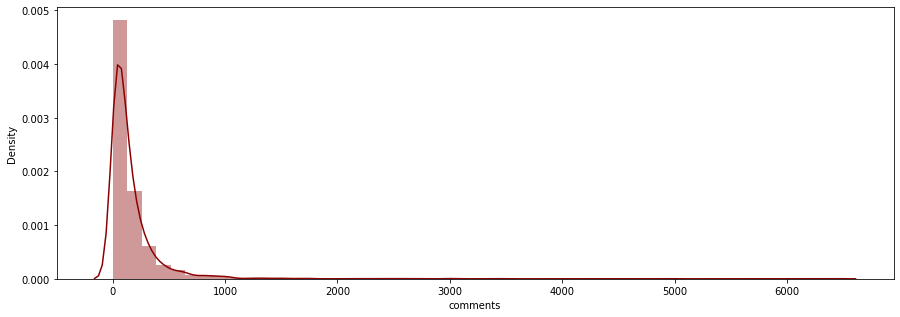

In [20]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['comments'],color="darkred")

In [ ]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

In [22]:
df[df['occupations'].isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
1142,1407,I am a pirate,Rick Falkvinge,{0: 'Rick Falkvinge'},NaN,"{0: 'Rick Falkvinge, didn’t plan on becoming a...",220557,2013-10-31,2012-04-01,TEDxOslo,en,"['ar', 'el', 'en', 'es', 'fr', 'it', 'ko', 'nl...",128.0,1097,"['Internet', 'TEDx', 'global issues', 'politic...","{1329: 'Why SOPA is a bad idea', 871: 'Re-exam...",https://www.ted.com/talks/rick_falkvinge_i_am_...,"The Pirate Party fights for transparency, anon...",Thank y'all! This is going to be a motivationa...
1170,1436,Tracking our online trackers,Gary Kovacs,{0: 'Gary Kovacs'},NaN,{0: 'Gary Kovacs is a technologist and the for...,2226169,2012-02-29,2012-05-03,TED2012,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",260.0,399,"['Internet', 'advertising', 'business', 'priva...","{1370: 'All your devices can be hacked', 788: ...",https://www.ted.com/talks/gary_kovacs_tracking...,"As you surf the Web, information is being coll...","I don't know why, but I'm continually amazed t..."
1241,1515,Image recognition that triggers augmented reality,Matt Mills,"{0: 'Matt Mills', 1: 'Tamara Roukaerts'}",NaN,"{0: 'Matt Mills comes from Aurasma, a startup ...",2677855,2012-06-26,2012-07-19,TEDGlobal 2012,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",140.0,484,"['demo', 'design', 'interface design', 'scienc...","{481: 'Meet the SixthSense interaction', 1411:...",https://www.ted.com/talks/matt_mills_image_rec...,Matt Mills and Tamara Roukaerts demonstrate Au...,So wouldn't it be amazing if our phones could ...
1859,2180,Old books reborn as art,Brian Dettmer,{0: 'Brian Dettmer'},NaN,{0: 'Artist Brian Dettmer digs into a good boo...,1278357,2014-11-04,2015-02-06,TEDYouth 2014,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",52.0,366,"['TEDYouth', 'art', 'creativity', 'books']","{610: 'Hold your breath for micro-sculpture', ...",https://www.ted.com/talks/brian_dettmer_old_bo...,What do you do with an outdated encyclopedia i...,I'm an artist and I cut books. This is one of ...
1897,2221,The day I stood up alone,Boniface Mwangi,{0: 'Boniface Mwangi'},NaN,{0: 'Boniface Mwangi is an award-winning Kenya...,1469362,2014-10-20,2015-04-02,TEDGlobal 2014,en,"['ar', 'bg', 'ca', 'cs', 'da', 'de', 'el', 'en...",79.0,440,"['TED Fellows', 'activism', 'art', 'corruption...","{1757: 'How I named, shamed and jailed', 84: '...",https://www.ted.com/talks/boniface_mwangi_the_...,Photographer Boniface Mwangi wanted to protest...,"People back home call me a heckler, a troublem..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,62554,What's the point(e) of ballet?,Ming Luke,{0: 'Ming Luke'},NaN,NaN,190644,2020-04-20,2020-04-20,TED-Ed,en,"['en', 'fr', 'pt-br']",NaN,279,"['TED-Ed', 'education', 'animation', 'dance', ...","{2763: 'The physics of the ""hardest move"" in b...",https://www.ted.com/talks/ming_luke_what_s_the...,A baby cursed at birth. A fierce battle of goo...,A baby cursed at birth. A fierce battle of goo...
3996,62707,The wildly complex anatomy of a sneaker,Angel Chang,{0: 'Angel Chang'},NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,en,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,https://www.ted.com/talks/angel_chang_the_wild...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet

In [65]:
df= pd.read_csv(File_path + 'data_ted_talks.csv')

In [71]:
#Fill NaN Values in comments Column with Median
df['comments'] = df['comments'].fillna(df['comments'].median())

In [73]:
df['occupations'] = df['occupations'].fillna(value="{0:['other']}")

In [69]:
df['about_speakers'] = df['about_speakers'].fillna(value="{0: 'other'}")

In [74]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
all_speakers     4
recorded_date    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
all_speakers     0.10
recorded_date    0.02
dtype: float64


In [75]:
#Dropping null as they are now negligible 
df.dropna(inplace=True)

In [79]:
df.isnull().any().any()

False

In [78]:
df.duplicated(subset=None, keep='first').any()

False

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4000 non-null   int64  
 1   title           4000 non-null   object 
 2   speaker_1       4000 non-null   object 
 3   all_speakers    4000 non-null   object 
 4   occupations     4000 non-null   object 
 5   about_speakers  4000 non-null   object 
 6   views           4000 non-null   int64  
 7   recorded_date   4000 non-null   object 
 8   published_date  4000 non-null   object 
 9   event           4000 non-null   object 
 10  native_lang     4000 non-null   object 
 11  available_lang  4000 non-null   object 
 12  comments        4000 non-null   float64
 13  duration        4000 non-null   int64  
 14  topics          4000 non-null   object 
 15  related_talks   4000 non-null   object 
 16  url             4000 non-null   object 
 17  description     4000 non-null   o

In [81]:
df['recorded_date']= pd.to_datetime(df['recorded_date'])
df['published_date']= pd.to_datetime(df['published_date'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4000 non-null   int64         
 1   title           4000 non-null   object        
 2   speaker_1       4000 non-null   object        
 3   all_speakers    4000 non-null   object        
 4   occupations     4000 non-null   object        
 5   about_speakers  4000 non-null   object        
 6   views           4000 non-null   int64         
 7   recorded_date   4000 non-null   datetime64[ns]
 8   published_date  4000 non-null   datetime64[ns]
 9   event           4000 non-null   object        
 10  native_lang     4000 non-null   object        
 11  available_lang  4000 non-null   object        
 12  comments        4000 non-null   float64       
 13  duration        4000 non-null   int64         
 14  topics          4000 non-null   object        
 15  rela

In [94]:
df['total_days_since_published']= df.published_date.max() - df.published_date

In [95]:
df.total_days_since_published

0      5056 days
1      5056 days
2      5056 days
3      5056 days
4      5056 days
          ...   
4000      3 days
4001      3 days
4002      2 days
4003      0 days
4004      0 days
Name: published_date, Length: 4000, dtype: timedelta64[ns]

In [96]:
df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,total_days_since_published
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days
